In [3]:
import tensorflow as tf
print(tf.__version__) 

2.3.0


In [4]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, \
  preprocess_input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
import pandas as pd
import sys, os
import time

In [5]:
from google.colab import drive
drive.mount("/content/drive")

dir = "/content/drive/My Drive/Colab Notebooks/THESIS"

Mounted at /content/drive


In [8]:
cd /content/drive/My Drive/Colab Notebooks/THESIS/final/8k_2k/

/content/drive/My Drive/Colab Notebooks/THESIS/final/8k_2k


In [9]:
ls

test/  train/


In [10]:
train_path = 'train'
valid_path = 'test'

In [11]:
IMAGE_SIZE = [227, 227]

In [12]:

image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

In [13]:
print(image_files)

['train/p/p37.jpg', 'train/p/p3699.jpg', 'train/p/p370.jpg', 'train/p/p3700.jpg', 'train/p/p3701.jpg', 'train/p/p3702.jpg', 'train/p/p3703.jpg', 'train/p/p3704.jpg', 'train/p/p3705.jpg', 'train/p/p3706.jpg', 'train/p/p3707.jpg', 'train/p/p3708.jpg', 'train/p/p3709.jpg', 'train/p/p371.jpg', 'train/p/p3710.jpg', 'train/p/p3711.jpg', 'train/p/p3712.jpg', 'train/p/p3713.jpg', 'train/p/p3714.jpg', 'train/p/p3715.jpg', 'train/p/p3716.jpg', 'train/p/p3717.jpg', 'train/p/p3718.jpg', 'train/p/p3719.jpg', 'train/p/p372.jpg', 'train/p/p3720.jpg', 'train/p/p3721.jpg', 'train/p/p3722.jpg', 'train/p/p3723.jpg', 'train/p/p3725.jpg', 'train/p/p3724.jpg', 'train/p/p3726.jpg', 'train/p/p3727.jpg', 'train/p/p3728.jpg', 'train/p/p3729.jpg', 'train/p/p373.jpg', 'train/p/p3730.jpg', 'train/p/p3731.jpg', 'train/p/p3732.jpg', 'train/p/p3733.jpg', 'train/p/p3734.jpg', 'train/p/p3735.jpg', 'train/p/p3737.jpg', 'train/p/p3736.jpg', 'train/p/p3738.jpg', 'train/p/p3739.jpg', 'train/p/p374.jpg', 'train/p/p3740.jpg'

In [14]:

folders = glob(train_path + '/*')
folders

['train/p', 'train/n']

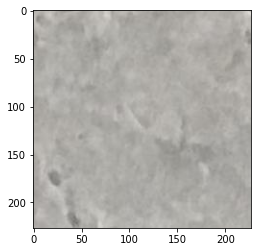

In [15]:
# look at an image for fun
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [16]:
K = len(folders) # number of classes
print(K)

2


In [17]:
# Build the model using the functional API
i = Input(shape=IMAGE_SIZE + [3])
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

#1
x = Conv2D(3, (20, 20), activation='relu', padding='same')(i)
x = BatchNormalization()(x)

#2
x = Conv2D(24, (7, 7), activation='relu', padding='same')(x)
#x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
#x = Dropout(0.2)(x)

#3
x = Conv2D(48, (15, 15), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

#4
x = Conv2D(48, (4, 4), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)


x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(96, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [18]:

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 227, 227, 3)       3603      
_________________________________________________________________
batch_normalization (BatchNo (None, 227, 227, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 227, 227, 24)      3552      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 113, 113, 24)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 113, 113, 48)      259248    
_________________________________________________________________
batch_normalization_1 (Batch (None, 113, 113, 48)     

In [19]:

gen_train = ImageDataGenerator()

gen_test = ImageDataGenerator()

In [20]:
batch_size = 128


train_generator = gen_train.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  batch_size=batch_size,
)
valid_generator = gen_test.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  batch_size=batch_size,
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [21]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [22]:
start_time = time.time()
r = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=10,
  steps_per_epoch=int(np.ceil(len(image_files) / batch_size)),
  validation_steps=int(np.ceil(len(valid_image_files) / batch_size)),
)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/10
63/63 [==============================] - 4273s 68s/step - loss: 1.4140 - accuracy: 0.9281 - val_loss: 557.6522 - val_accuracy: 0.5020
Epoch 2/10
63/63 [==============================] - 23s 362ms/step - loss: 0.0874 - accuracy: 0.9734 - val_loss: 2.5209 - val_accuracy: 0.7645
Epoch 3/10
63/63 [==============================] - 23s 358ms/step - loss: 0.0645 - accuracy: 0.9796 - val_loss: 0.0887 - val_accuracy: 0.9775
Epoch 4/10
63/63 [==============================] - 23s 358ms/step - loss: 0.0472 - accuracy: 0.9829 - val_loss: 0.0520 - val_accuracy: 0.9855
Epoch 5/10
63/63 [==============================] - 23s 366ms/step - loss: 0.0377 - accuracy: 0.9894 - val_loss: 0.0443 - val_accuracy: 0.9840
Epoch 6/10
63/63 [==============================] - 23s 358ms/step - loss: 0.0313 - accuracy: 0.9890 - val_loss: 0.0557 - val_accuracy: 0.9855
Epoch 7/10
63/63 [==============================] - 23s 362ms/step - loss: 0.0280 - accuracy: 0.9918 - val_loss: 0.0295 - val_accuracy: 0.99

In [ ]:
#took 2 hrs to do the training in GPU

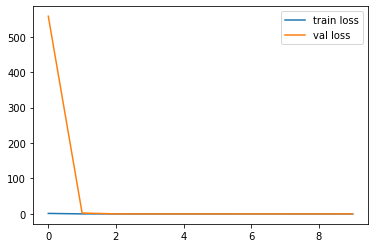

In [23]:

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('loss_barebone.jpg')
plt.show()

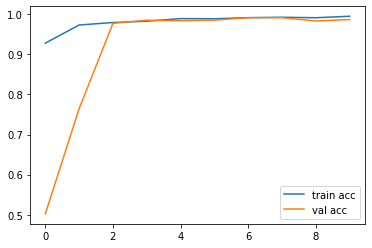

In [24]:

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('accuracy_barebone.jpg')
plt.show()

In [26]:
#cd /content/drive/My Drive/Colab Notebooks/THESIS/final/saved
model.save('dcnn_8k_2k.h5') 